# 1.Load and Evaluate Data

In [66]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
np.random.seed(10)
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns

# Required magic to display matplotlib plots in notebooks
%matplotlib inline

from sklearn import metrics
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.model_selection import train_test_split

# Input data files are available in the "../input/" directory.
        
data = pd.read_csv('UCI Breast Cancer Wisconsin.csv')

In [67]:
# (row, collumn)
data.shape

(569, 33)

In [68]:
data.columns

Index(['id', 'diagnosis', 'radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst', 'Unnamed: 32'],
      dtype='object')

In [69]:
data.head(4)

id diagnosis  radius_mean  texture_mean  perimeter_mean  area_mean  \
0    842302         M        17.99         10.38          122.80     1001.0   
1    842517         M        20.57         17.77          132.90     1326.0   
2  84300903         M        19.69         21.25          130.00     1203.0   
3  84348301         M        11.42         20.38           77.58      386.1   

   smoothness_mean  compactness_mean  concavity_mean  concave points_mean  \
0          0.11840           0.27760          0.3001              0.14710   
1          0.08474           0.07864          0.0869              0.07017   
2          0.10960           0.15990          0.1974              0.12790   
3          0.14250           0.28390          0.2414              0.10520   

   ...  texture_worst  perimeter_worst  area_worst  smoothness_worst  \
0  ...          17.33           184.60      2019.0            0.1622   
1  ...          23.41           158.80      1956.0            0.1238   
2  ...          25.53           152.50      1709.0            0.1444   
3  ...          26.50            98.87       567.7            0.2098   

   compactness_worst  concavity_worst  concave points_worst  symmetry_worst  \
0             0.6656           0.7119                0.2654          0.4601   
1             0.1866           0.2416                0.1860          0.2750   
2             0.4245           0.4504                0.2430          0.3613   
3             0.8663           0.6869                0.2575          0.6638   

   fractal_dimension_worst  Unnamed: 32  
0                  0.11890          NaN  
1                  0.08902          NaN  
2                  0.08758          NaN  
3                  0.17300          NaN  

[4 rows x 33 columns]

In [70]:
data.dtypes

id                           int64
diagnosis                   object
radius_mean                float64
texture_mean               float64
perimeter_mean             float64
area_mean                  float64
smoothness_mean            float64
compactness_mean           float64
concavity_mean             float64
concave points_mean        float64
symmetry_mean              float64
fractal_dimension_mean     float64
radius_se                  float64
texture_se                 float64
perimeter_se               float64
area_se                    float64
smoothness_se              float64
compactness_se             float64
concavity_se               float64
concave points_se          float64
symmetry_se                float64
fractal_dimension_se       float64
radius_worst               float64
texture_worst              float64
perimeter_worst            float64
area_worst                 float64
smoothness_worst           float64
compactness_worst          float64
concavity_worst     

In [71]:
data.describe()

id  radius_mean  texture_mean  perimeter_mean    area_mean  \
count  5.690000e+02   569.000000    569.000000      569.000000   569.000000   
mean   3.037183e+07    14.127292     19.289649       91.969033   654.889104   
std    1.250206e+08     3.524049      4.301036       24.298981   351.914129   
min    8.670000e+03     6.981000      9.710000       43.790000   143.500000   
25%    8.692180e+05    11.700000     16.170000       75.170000   420.300000   
50%    9.060240e+05    13.370000     18.840000       86.240000   551.100000   
75%    8.813129e+06    15.780000     21.800000      104.100000   782.700000   
max    9.113205e+08    28.110000     39.280000      188.500000  2501.000000   

       smoothness_mean  compactness_mean  concavity_mean  concave points_mean  \
count       569.000000        569.000000      569.000000           569.000000   
mean          0.096360          0.104341        0.088799             0.048919   
std           0.014064          0.052813        0.079720             0.038803   
min           0.052630          0.019380        0.000000             0.000000   
25%           0.086370          0.064920        0.029560             0.020310   
50%           0.095870          0.092630        0.061540             0.033500   
75%           0.105300          0.130400        0.130700             0.074000   
max           0.163400          0.345400        0.426800             0.201200   

       symmetry_mean  ...  texture_worst  perimeter_worst   area_worst  \
count     569.000000  ...     569.000000       569.000000   569.000000   
mean        0.181162  ...      25.677223       107.261213   880.583128   
std         0.027414  ...       6.146258        33.602542   569.356993   
min         0.106000  ...      12.020000        50.410000   185.200000   
25%         0.161900  ...      21.080000        84.110000   515.300000   
50%         0.179200  ...      25.410000        97.660000   686.500000   
75%         0.195700  ...      29.720000       125.400000  1084.000000   
max         0.304000  ...      49.540000       251.200000  4254.000000   

       smoothness_worst  compactness_worst  concavity_worst  \
count        569.000000         569.000000       569.000000   
mean           0.132369           0.254265         0.272188   
std            0.022832           0.157336         0.208624   
min            0.071170           0.027290         0.000000   
25%            0.116600           0.147200         0.114500   
50%            0.131300           0.211900         0.226700   
75%            0.146000           0.339100         0.382900   
max            0.222600           1.058000         1.252000   

       concave points_worst  symmetry_worst  fractal_dimension_worst  \
count            569.000000      569.000000               569.000000   
mean               0.114606        0.290076                 0.083946   
std                0.065732        0.061867                 0.018061   
min                0.000000        0.156500                 0.055040   
25%                0.064930        0.250400                 0.071460   
50%                0.099930        0.282200                 0.080040   
75%                0.161400        0.317900                 0.092080   
max                0.291000        0.663800                 0.207500   

       Unnamed: 32  
count          0.0  
mean           NaN  
std            NaN  
min            NaN  
25%            NaN  
50%            NaN  
75%            NaN  
max            NaN  

[8 rows x 32 columns]

<AxesSubplot:>

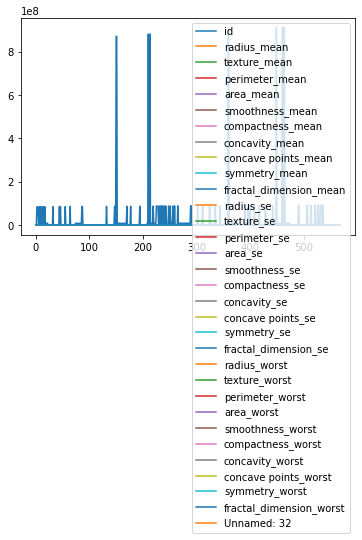

In [72]:
data.plot()

In [73]:
data.isna().sum()

id                           0
diagnosis                    0
radius_mean                  0
texture_mean                 0
perimeter_mean               0
area_mean                    0
smoothness_mean              0
compactness_mean             0
concavity_mean               0
concave points_mean          0
symmetry_mean                0
fractal_dimension_mean       0
radius_se                    0
texture_se                   0
perimeter_se                 0
area_se                      0
smoothness_se                0
compactness_se               0
concavity_se                 0
concave points_se            0
symmetry_se                  0
fractal_dimension_se         0
radius_worst                 0
texture_worst                0
perimeter_worst              0
area_worst                   0
smoothness_worst             0
compactness_worst            0
concavity_worst              0
concave points_worst         0
symmetry_worst               0
fractal_dimension_worst      0
Unnamed:

In [74]:
data['diagnosis'].value_counts()

B    357
M    212
Name: diagnosis, dtype: int64

# 2.Feature Engineering

In [75]:
# Subtract id, diagnosis, and unnamed collumn
dt = data.iloc[:,2:32]
dt.head(4)

radius_mean  texture_mean  perimeter_mean  area_mean  smoothness_mean  \
0        17.99         10.38          122.80     1001.0          0.11840   
1        20.57         17.77          132.90     1326.0          0.08474   
2        19.69         21.25          130.00     1203.0          0.10960   
3        11.42         20.38           77.58      386.1          0.14250   

   compactness_mean  concavity_mean  concave points_mean  symmetry_mean  \
0           0.27760          0.3001              0.14710         0.2419   
1           0.07864          0.0869              0.07017         0.1812   
2           0.15990          0.1974              0.12790         0.2069   
3           0.28390          0.2414              0.10520         0.2597   

   fractal_dimension_mean  ...  radius_worst  texture_worst  perimeter_worst  \
0                 0.07871  ...         25.38          17.33           184.60   
1                 0.05667  ...         24.99          23.41           158.80   
2                 0.05999  ...         23.57          25.53           152.50   
3                 0.09744  ...         14.91          26.50            98.87   

   area_worst  smoothness_worst  compactness_worst  concavity_worst  \
0      2019.0            0.1622             0.6656           0.7119   
1      1956.0            0.1238             0.1866           0.2416   
2      1709.0            0.1444             0.4245           0.4504   
3       567.7            0.2098             0.8663           0.6869   

   concave points_worst  symmetry_worst  fractal_dimension_worst  
0                0.2654          0.4601                  0.11890  
1                0.1860          0.2750                  0.08902  
2                0.2430          0.3613                  0.08758  
3                0.2575          0.6638                  0.17300  

[4 rows x 30 columns]

In [76]:
dt.describe()

radius_mean  texture_mean  perimeter_mean    area_mean  \
count   569.000000    569.000000      569.000000   569.000000   
mean     14.127292     19.289649       91.969033   654.889104   
std       3.524049      4.301036       24.298981   351.914129   
min       6.981000      9.710000       43.790000   143.500000   
25%      11.700000     16.170000       75.170000   420.300000   
50%      13.370000     18.840000       86.240000   551.100000   
75%      15.780000     21.800000      104.100000   782.700000   
max      28.110000     39.280000      188.500000  2501.000000   

       smoothness_mean  compactness_mean  concavity_mean  concave points_mean  \
count       569.000000        569.000000      569.000000           569.000000   
mean          0.096360          0.104341        0.088799             0.048919   
std           0.014064          0.052813        0.079720             0.038803   
min           0.052630          0.019380        0.000000             0.000000   
25%           0.086370          0.064920        0.029560             0.020310   
50%           0.095870          0.092630        0.061540             0.033500   
75%           0.105300          0.130400        0.130700             0.074000   
max           0.163400          0.345400        0.426800             0.201200   

       symmetry_mean  fractal_dimension_mean  ...  radius_worst  \
count     569.000000              569.000000  ...    569.000000   
mean        0.181162                0.062798  ...     16.269190   
std         0.027414                0.007060  ...      4.833242   
min         0.106000                0.049960  ...      7.930000   
25%         0.161900                0.057700  ...     13.010000   
50%         0.179200                0.061540  ...     14.970000   
75%         0.195700                0.066120  ...     18.790000   
max         0.304000                0.097440  ...     36.040000   

       texture_worst  perimeter_worst   area_worst  smoothness_worst  \
count     569.000000       569.000000   569.000000        569.000000   
mean       25.677223       107.261213   880.583128          0.132369   
std         6.146258        33.602542   569.356993          0.022832   
min        12.020000        50.410000   185.200000          0.071170   
25%        21.080000        84.110000   515.300000          0.116600   
50%        25.410000        97.660000   686.500000          0.131300   
75%        29.720000       125.400000  1084.000000          0.146000   
max        49.540000       251.200000  4254.000000          0.222600   

       compactness_worst  concavity_worst  concave points_worst  \
count         569.000000       569.000000            569.000000   
mean            0.254265         0.272188              0.114606   
std             0.157336         0.208624              0.065732   
min             0.027290         0.000000              0.000000   
25%             0.147200         0.114500              0.064930   
50%             0.211900         0.226700              0.099930   
75%             0.339100         0.382900              0.161400   
max             1.058000         1.252000              0.291000   

       symmetry_worst  fractal_dimension_worst  
count      569.000000               569.000000  
mean         0.290076                 0.083946  
std          0.061867                 0.018061  
min          0.156500                 0.055040  
25%          0.250400                 0.071460  
50%          0.282200                 0.080040  
75%          0.317900                 0.092080  
max          0.663800                 0.207500  

[8 rows x 30 columns]

In [77]:
# Rescale every column to 0-1 scale using min-max normalization
dt = (dt-dt.min())/(dt.max()-dt.min())
dt.head(4)

radius_mean  texture_mean  perimeter_mean  area_mean  smoothness_mean  \
0     0.521037      0.022658        0.545989   0.363733         0.593753   
1     0.643144      0.272574        0.615783   0.501591         0.289880   
2     0.601496      0.390260        0.595743   0.449417         0.514309   
3     0.210090      0.360839        0.233501   0.102906         0.811321   

   compactness_mean  concavity_mean  concave points_mean  symmetry_mean  \
0          0.792037        0.703140             0.731113       0.686364   
1          0.181768        0.203608             0.348757       0.379798   
2          0.431017        0.462512             0.635686       0.509596   
3          0.811361        0.565604             0.522863       0.776263   

   fractal_dimension_mean  ...  radius_worst  texture_worst  perimeter_worst  \
0                0.605518  ...      0.620776       0.141525         0.668310   
1                0.141323  ...      0.606901       0.303571         0.539818   
2                0.211247  ...      0.556386       0.360075         0.508442   
3                1.000000  ...      0.248310       0.385928         0.241347   

   area_worst  smoothness_worst  compactness_worst  concavity_worst  \
0    0.450698          0.601136           0.619292         0.568610   
1    0.435214          0.347553           0.154563         0.192971   
2    0.374508          0.483590           0.385375         0.359744   
3    0.094008          0.915472           0.814012         0.548642   

   concave points_worst  symmetry_worst  fractal_dimension_worst  
0              0.912027        0.598462                 0.418864  
1              0.639175        0.233590                 0.222878  
2              0.835052        0.403706                 0.213433  
3              0.884880        1.000000                 0.773711  

[4 rows x 30 columns]

In [78]:
dt.describe()

radius_mean  texture_mean  perimeter_mean   area_mean  smoothness_mean  \
count   569.000000    569.000000      569.000000  569.000000       569.000000   
mean      0.338222      0.323965        0.332935    0.216920         0.394785   
std       0.166787      0.145453        0.167915    0.149274         0.126967   
min       0.000000      0.000000        0.000000    0.000000         0.000000   
25%       0.223342      0.218465        0.216847    0.117413         0.304595   
50%       0.302381      0.308759        0.293345    0.172895         0.390358   
75%       0.416442      0.408860        0.416765    0.271135         0.475490   
max       1.000000      1.000000        1.000000    1.000000         1.000000   

       compactness_mean  concavity_mean  concave points_mean  symmetry_mean  \
count        569.000000      569.000000           569.000000     569.000000   
mean           0.260601        0.208058             0.243137       0.379605   
std            0.161992        0.186785             0.192857       0.138456   
min            0.000000        0.000000             0.000000       0.000000   
25%            0.139685        0.069260             0.100944       0.282323   
50%            0.224679        0.144189             0.166501       0.369697   
75%            0.340531        0.306232             0.367793       0.453030   
max            1.000000        1.000000             1.000000       1.000000   

       fractal_dimension_mean  ...  radius_worst  texture_worst  \
count              569.000000  ...    569.000000     569.000000   
mean                 0.270379  ...      0.296663       0.363998   
std                  0.148702  ...      0.171940       0.163813   
min                  0.000000  ...      0.000000       0.000000   
25%                  0.163016  ...      0.180719       0.241471   
50%                  0.243892  ...      0.250445       0.356876   
75%                  0.340354  ...      0.386339       0.471748   
max                  1.000000  ...      1.000000       1.000000   

       perimeter_worst  area_worst  smoothness_worst  compactness_worst  \
count       569.000000  569.000000        569.000000         569.000000   
mean          0.283138    0.170906          0.404138           0.220212   
std           0.167352    0.139932          0.150779           0.152649   
min           0.000000    0.000000          0.000000           0.000000   
25%           0.167837    0.081130          0.300007           0.116337   
50%           0.235320    0.123206          0.397081           0.179110   
75%           0.373475    0.220901          0.494156           0.302520   
max           1.000000    1.000000          1.000000           1.000000   

       concavity_worst  concave points_worst  symmetry_worst  \
count       569.000000            569.000000      569.000000   
mean          0.217403              0.393836        0.263307   
std           0.166633              0.225884        0.121954   
min           0.000000              0.000000        0.000000   
25%           0.091454              0.223127        0.185098   
50%           0.181070              0.343402        0.247782   
75%           0.305831              0.554639        0.318155   
max           1.000000              1.000000        1.000000   

       fractal_dimension_worst  
count               569.000000  
mean                  0.189596  
std                   0.118466  
min                   0.000000  
25%                   0.107700  
50%                   0.163977  
75%                   0.242949  
max                   1.000000  

[8 rows x 30 columns]

<AxesSubplot:>

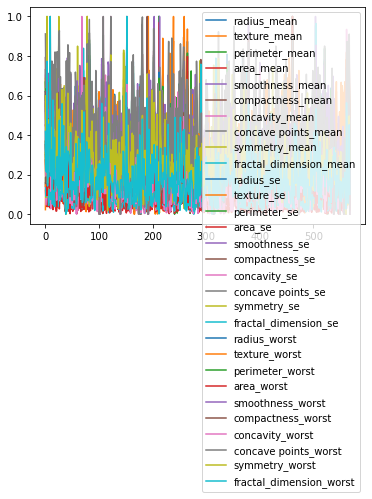

In [79]:
dt.plot()

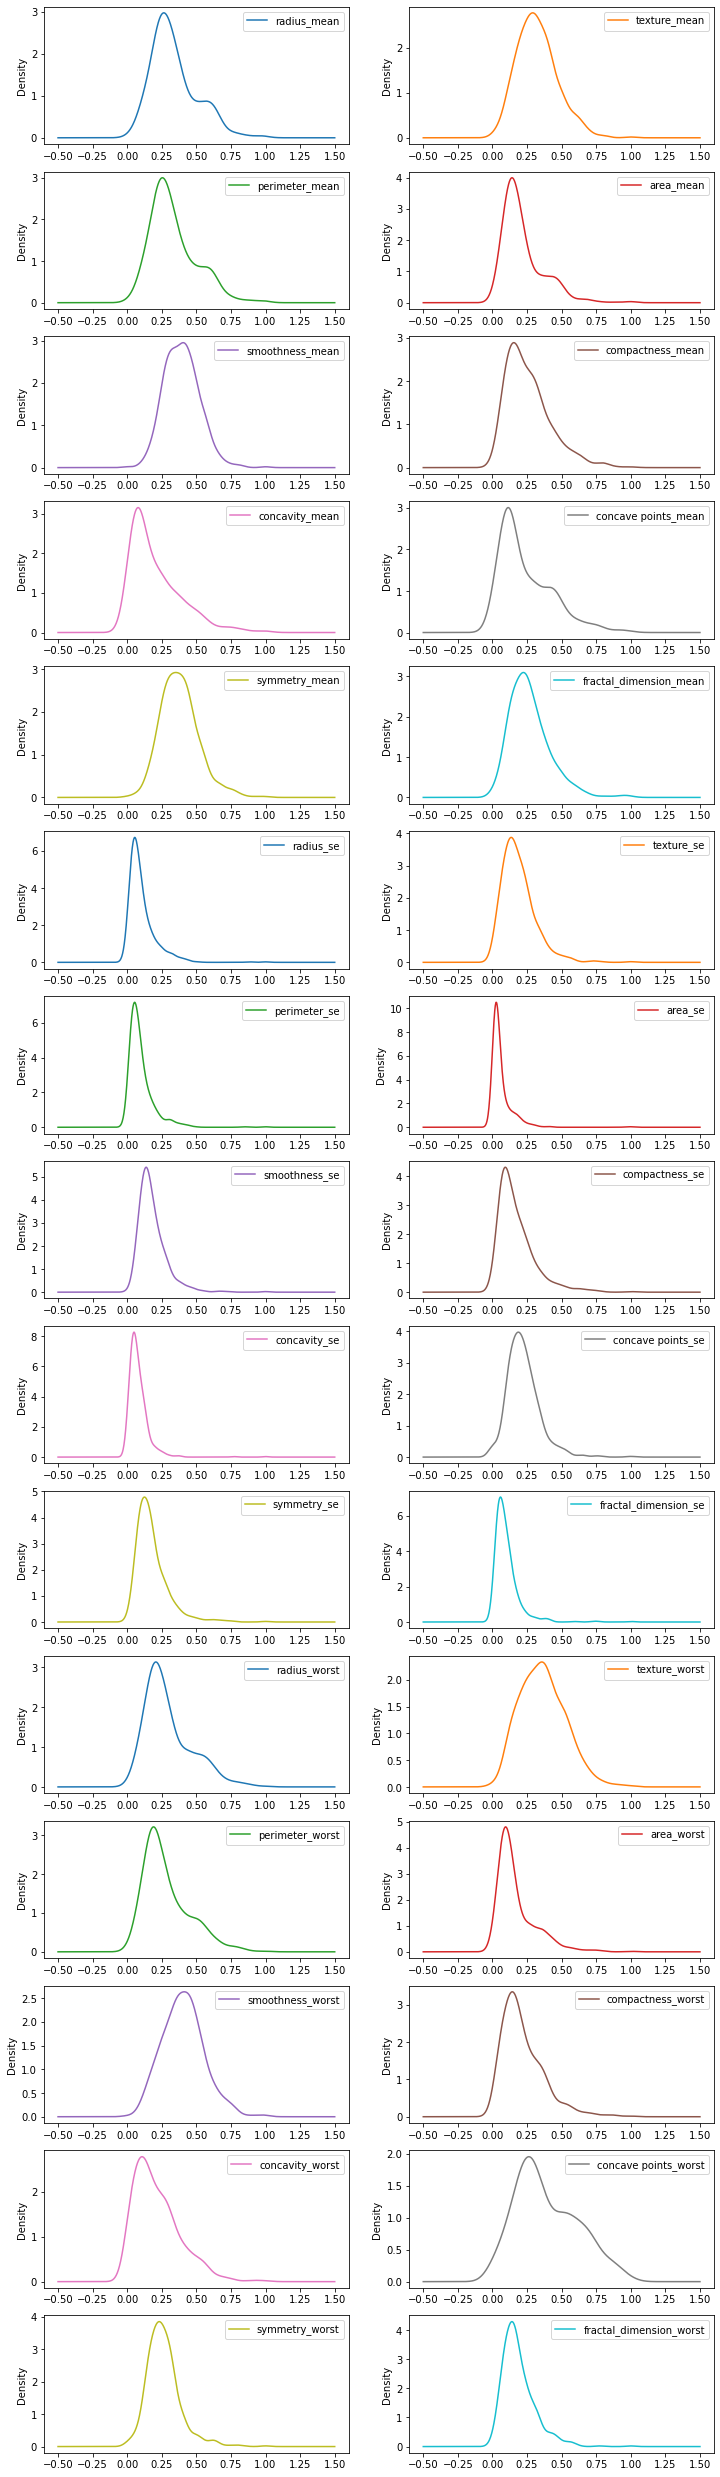

In [80]:
dt.plot(kind='density',subplots=True,layout=(15,2),figsize=(12,45),sharex=False)
plt.show()

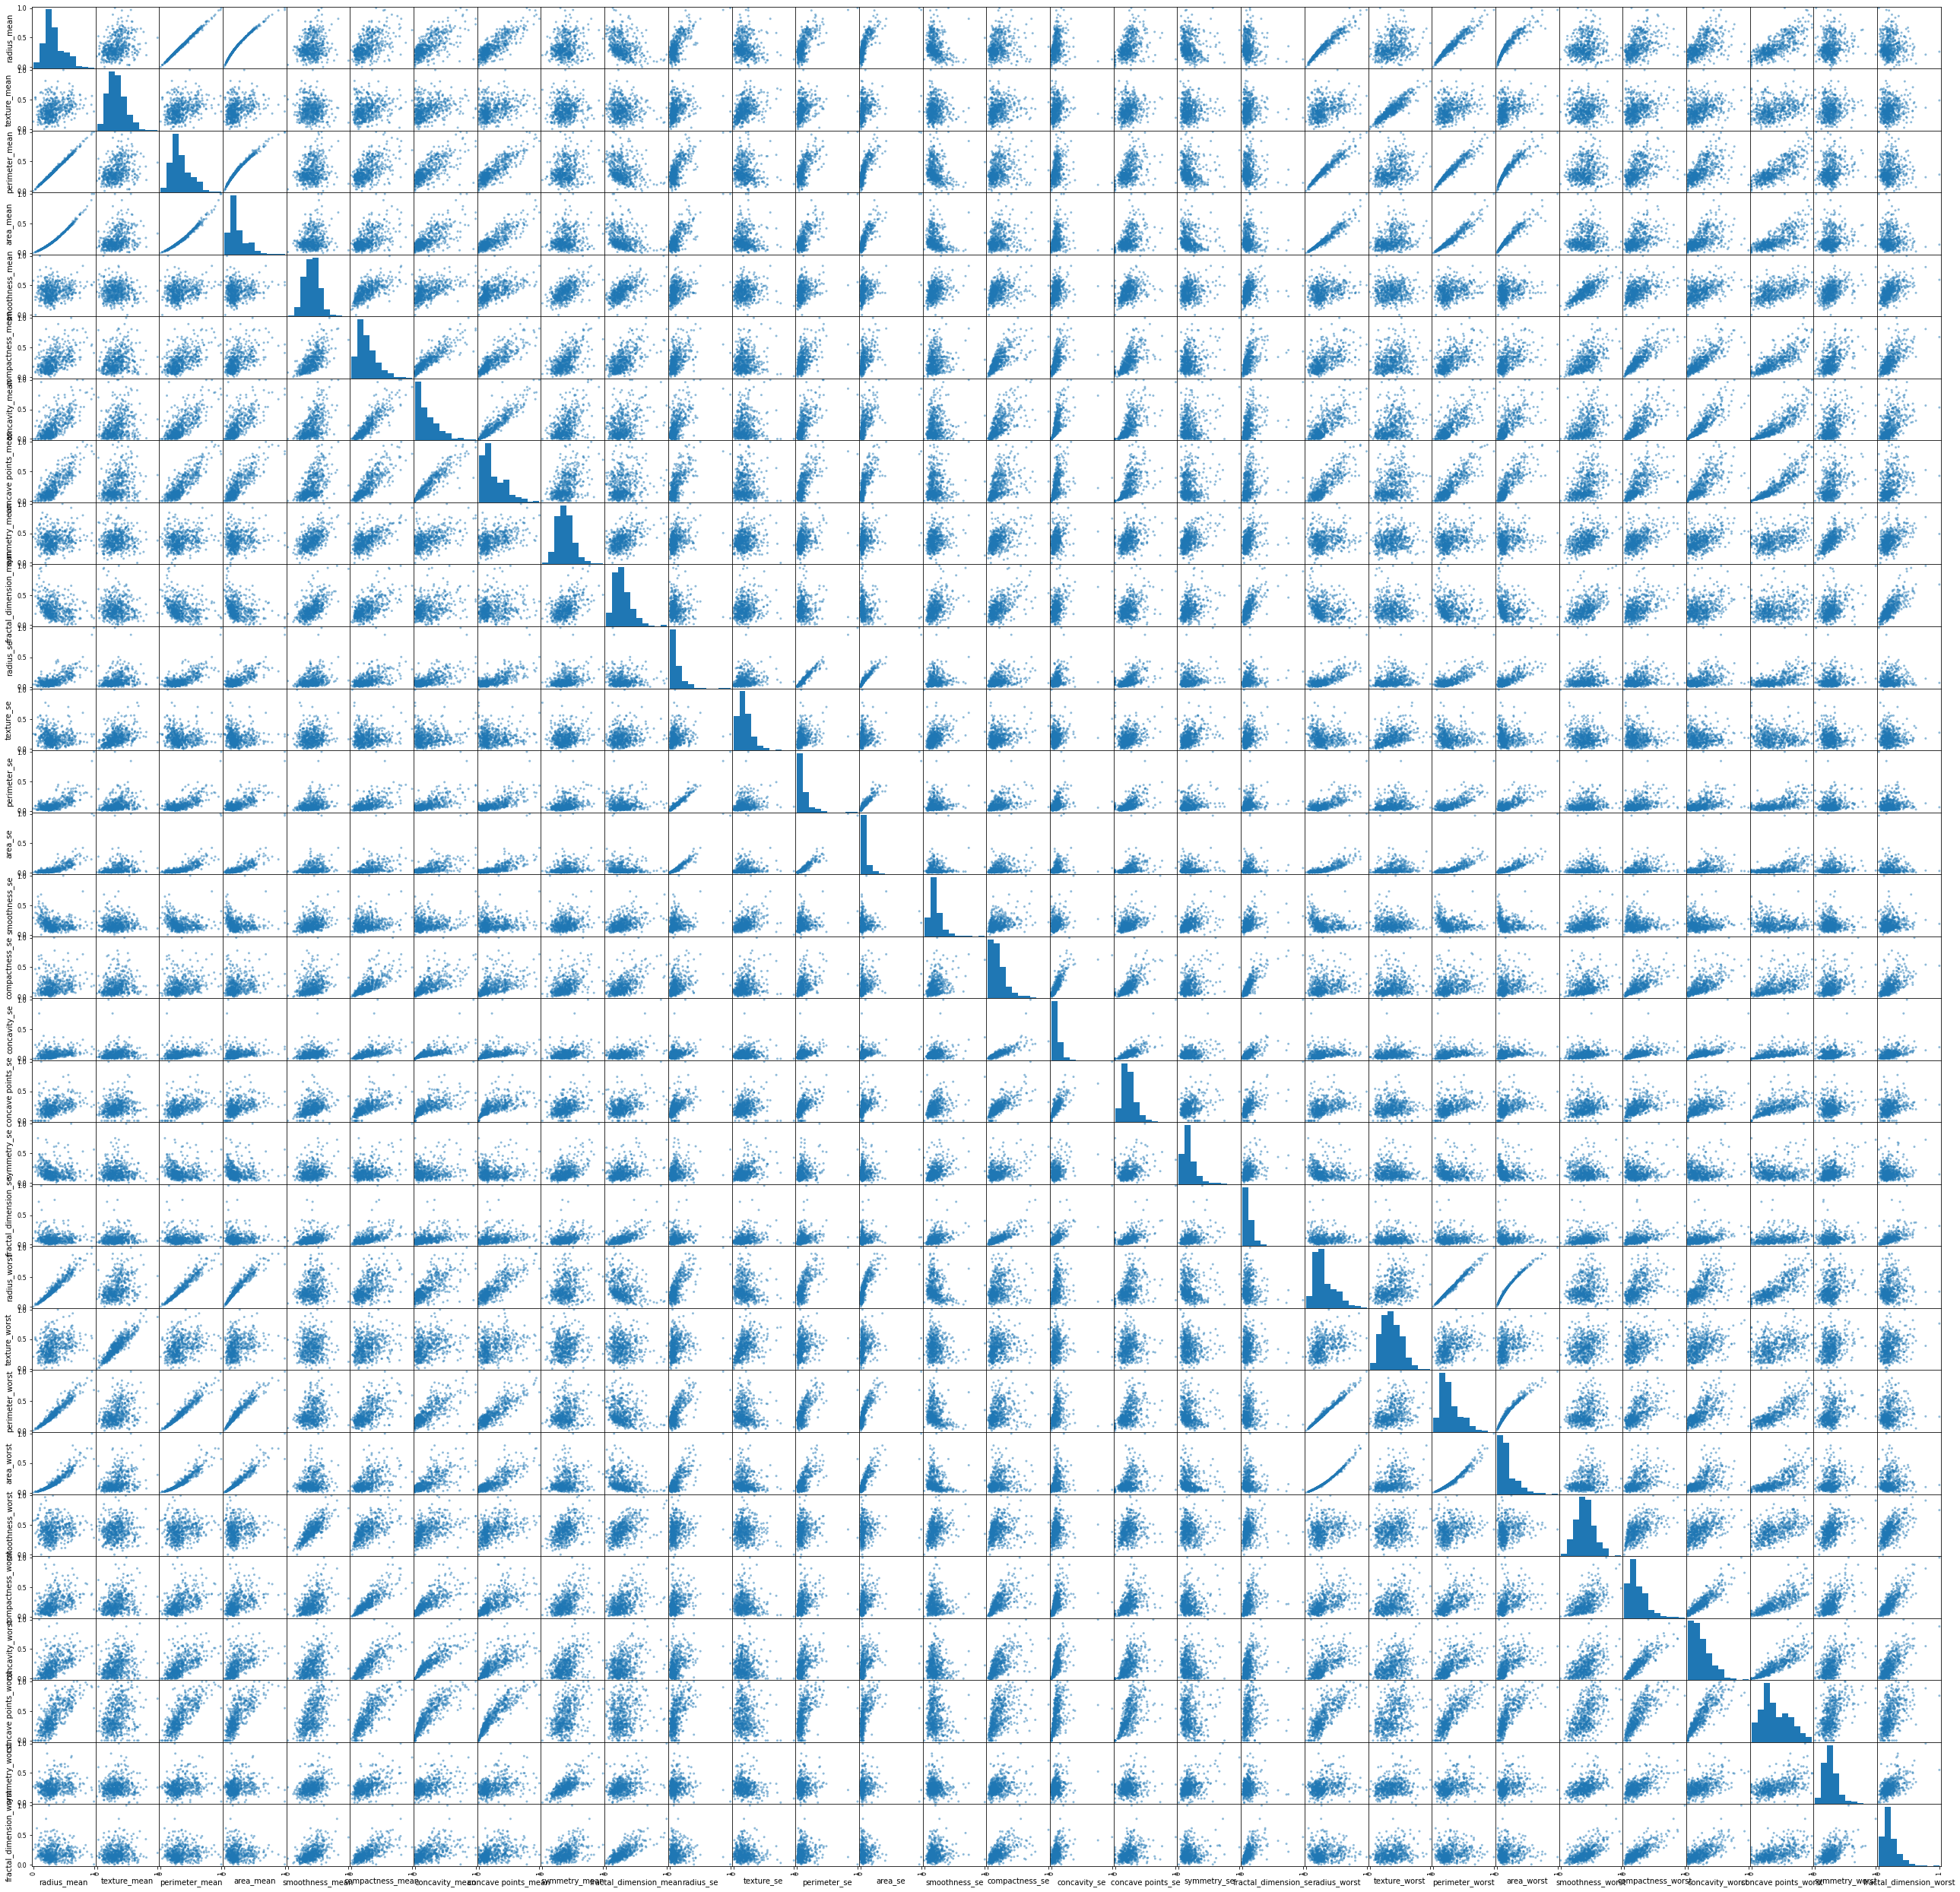

In [81]:
pd.plotting.scatter_matrix(dt,figsize=(45,45))
plt.show()

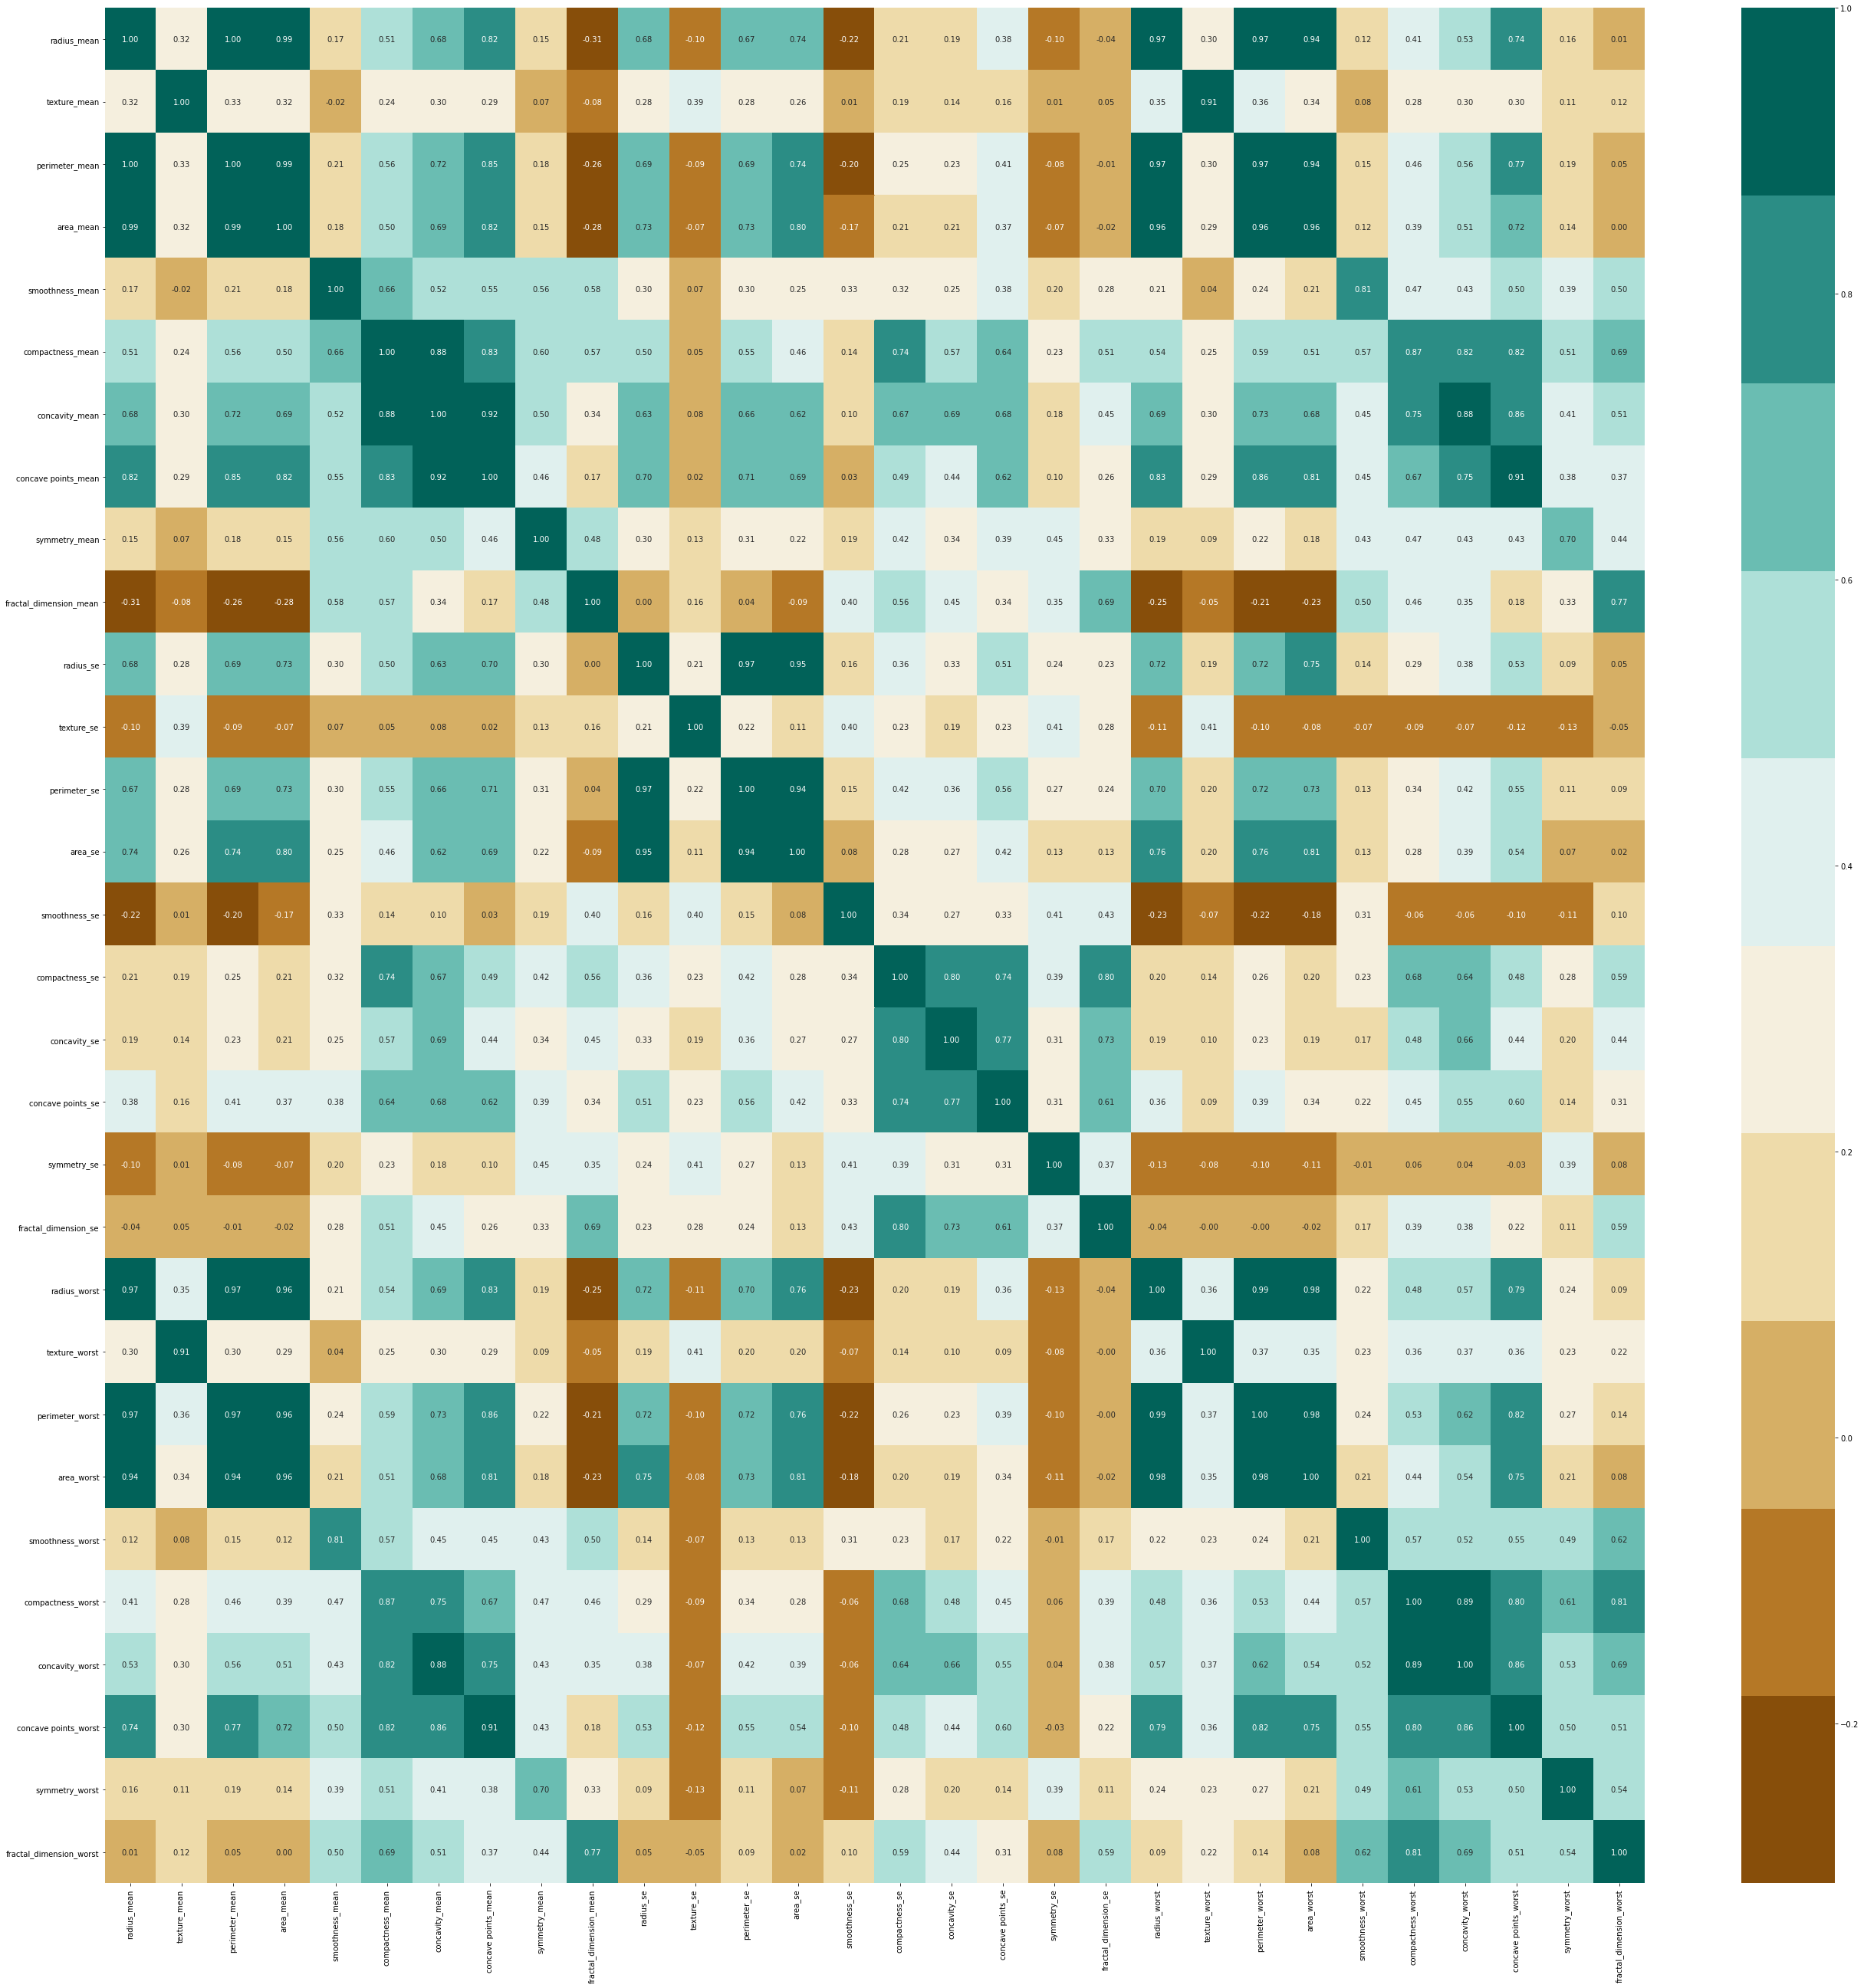

In [82]:
# Plot figsize
fig, ax = plt.subplots(figsize=(45, 45))
# Generate Color Map
# colormap = sns.diverging_palette(220, 10, as_cmap=True)
colormap = sns.color_palette("BrBG", 10)
# Generate Heat Map, allow annotations and place floats in map
sns.heatmap(dt.corr(), cmap=colormap, annot=True, fmt=".2f")
#ax.set_yticklabels(column_names);
plt.show()

Diagnosis `M` akan diberikan nilai 1.
Diagnosis `B` akan diberikan 0.

In [83]:
# Convert filtered and label data to numpy array
features = np.array(dt)
labels = np.array([1 if item == "M" else 0 for item in data['diagnosis']])

# 3.Define Perceptor

In [84]:
# Define the sigmoid activator; we ask if we want the sigmoid or its derivative
def sigmoid_act(x, der=False):
    import numpy as np
    
    if (der==True) : #derivative of the sigmoid
        f = 1/(1+ np.exp(- x))*(1-1/(1+ np.exp(- x)))
    else : # sigmoid
        f = 1/(1+ np.exp(- x))
    
    return f

# We may employ the Rectifier Linear Unit (ReLU)
def ReLU_act(x, der=False):
    import numpy as np
    
    if (der == True): # the derivative of the ReLU is the Heaviside Theta
        f = np.heaviside(x, 1)
    else :
        f = np.maximum(x, 0)
    
    return f

# Now we are ready to define the perceptron; 
# it eats a np.array (that may be a list of features )
def perceptron(X, act='Sigmoid'): 
    import numpy as np
    
    shapes = X.shape # Pick the number of (rows, columns)!
    n= shapes[0]+shapes[1]
    # Generating random weights and bias
    w = 2*np.random.random(shapes) - 0.5 # We want w to be between -1 and 1
    b = np.random.random(1)
    
    # Initialize the function
    f = b[0]
    for i in range(0, X.shape[0]-1) : # run over column elements
        for j in range(0, X.shape[1]-1) : # run over rows elements
            f += w[i, j]*X[i,j]/n
    # Pass it to the activation function and return it as an output
    if act == 'Sigmoid':
        output = sigmoid_act(f)
    else :
        output = ReLU_act(f)
        
    return output

An example of an output of the Perceptron

In [85]:
print('Output with sigmoid activator: ', perceptron(features))
print('Output with ReLU activator: ', perceptron(features, 'ReLU'))

Output with sigmoid activator:  0.9778050810488007
Output with ReLU activator:  3.413750857130389


# 4. Select and Train Neural Network

## Train/Test Split
The features dataset will be splitted into a training set and a test set.

In [86]:
# split into training and testing sets
from sklearn.model_selection import train_test_split

X_train, X_test, Y_train, Y_test = train_test_split(features, labels, test_size=0.30)

print('Training records:',Y_train.size)
print('Test records:',Y_test.size)

Training records: 398
Test records: 171


## Training the Model

<ipython-input-84-9eff6c5bb39b>:8: RuntimeWarning: overflow encountered in exp
  f = 1/(1+ np.exp(- x))


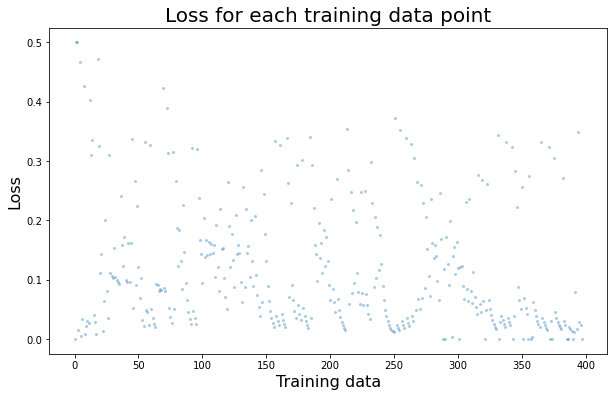

IndexError: list index out of range

In [87]:
# Set up the number of perceptron per each layer:
p=30 # Layer 1
q=30 # Layer 2

# Set up the Learning rate
eta =  0.3


# 0: Random initialize the relevant data 
w1 = 2*np.random.rand(p , X_train.shape[1]) - 0.5 # Layer 1
b1 = np.random.rand(p)

w2 = 2*np.random.rand(q , p) - 0.5  # Layer 2
b2 = np.random.rand(q)

wOut = 2*np.random.rand(q) - 0.5  # Output Layer
bOut = np.random.rand(1)

mu = []
vec_y = []

# Start looping over the passengers, i.e. over I.

for I in range(0, X_train.shape[0]): #loop in all the passengers:
    
    # 1: input the data 
    x = X_train[I]
    
    
    # 2: Start the algorithm
    
    # 2.1: Feed forward
    z1 = ReLU_act(np.dot(w1, x) + b1) # output layer 1 
    z2 = ReLU_act(np.dot(w2, z1) + b2) # output layer 2
    y = sigmoid_act(np.dot(wOut, z2) + bOut) # Output of the Output layer
    
    #2.2: Compute the output layer's error
    delta_Out =  (y-Y_train[I]) * sigmoid_act(y, der=True)
    
    #2.3: Backpropagate
    delta_2 = delta_Out * wOut * ReLU_act(z2, der=True) # Second Layer Error
    delta_1 = np.dot(delta_2, w2) * ReLU_act(z1, der=True) # First Layer Error
    
    # 3: Gradient descent 
    wOut = wOut - eta*delta_Out*z2  # Outer Layer
    bOut = bOut - eta*delta_Out
    
    w2 = w2 - eta*np.kron(delta_2, z1).reshape(q,p) # Hidden Layer 2
    b2 = b2 - eta*delta_2
    
    w1 = w1 - eta*np.kron(delta_1, x).reshape(p, x.shape[0]) # Hidden Layer 1
    b1 = b1 - eta*delta_1
    
    # 4. Computation of the loss function
    mu.append((1/2)*(y-Y_train[I])**2)
    vec_y.append(y[0])


# Plotting the Cost function for each training data     
plt.figure(figsize=(10,6))
plt.scatter(np.arange(0, X_train.shape[0]), mu, alpha=0.3, s=4, label='mu')
plt.title('Loss for each training data point', fontsize=20)
plt.xlabel('Training data', fontsize=16)
plt.ylabel('Loss', fontsize=16)
plt.show()

# Plotting the average cost function over 10 training data    
pino = []
for i in range(0, 9):
    pippo = 0
    for m in range(0, 59):
        pippo+=vec_y[60*i+m]/60
    pino.append(pippo)
    
    

plt.figure(figsize=(10,6))
plt.scatter(np.arange(0, 9), pino, alpha=1, s=10, label='error')
plt.title('Averege Loss by epoch', fontsize=20)
plt.xlabel('Epoch', fontsize=16)
plt.ylabel('Loss', fontsize=16)
plt.show()

return w1, b1, w2, b2, wOut, bOut, mu